# QUESTION 1

Answer:**B**

# QUESTION 2

Answer:**C**

# QUESTION 3

Answer:**A**

# QUESTION 4

gradient 1

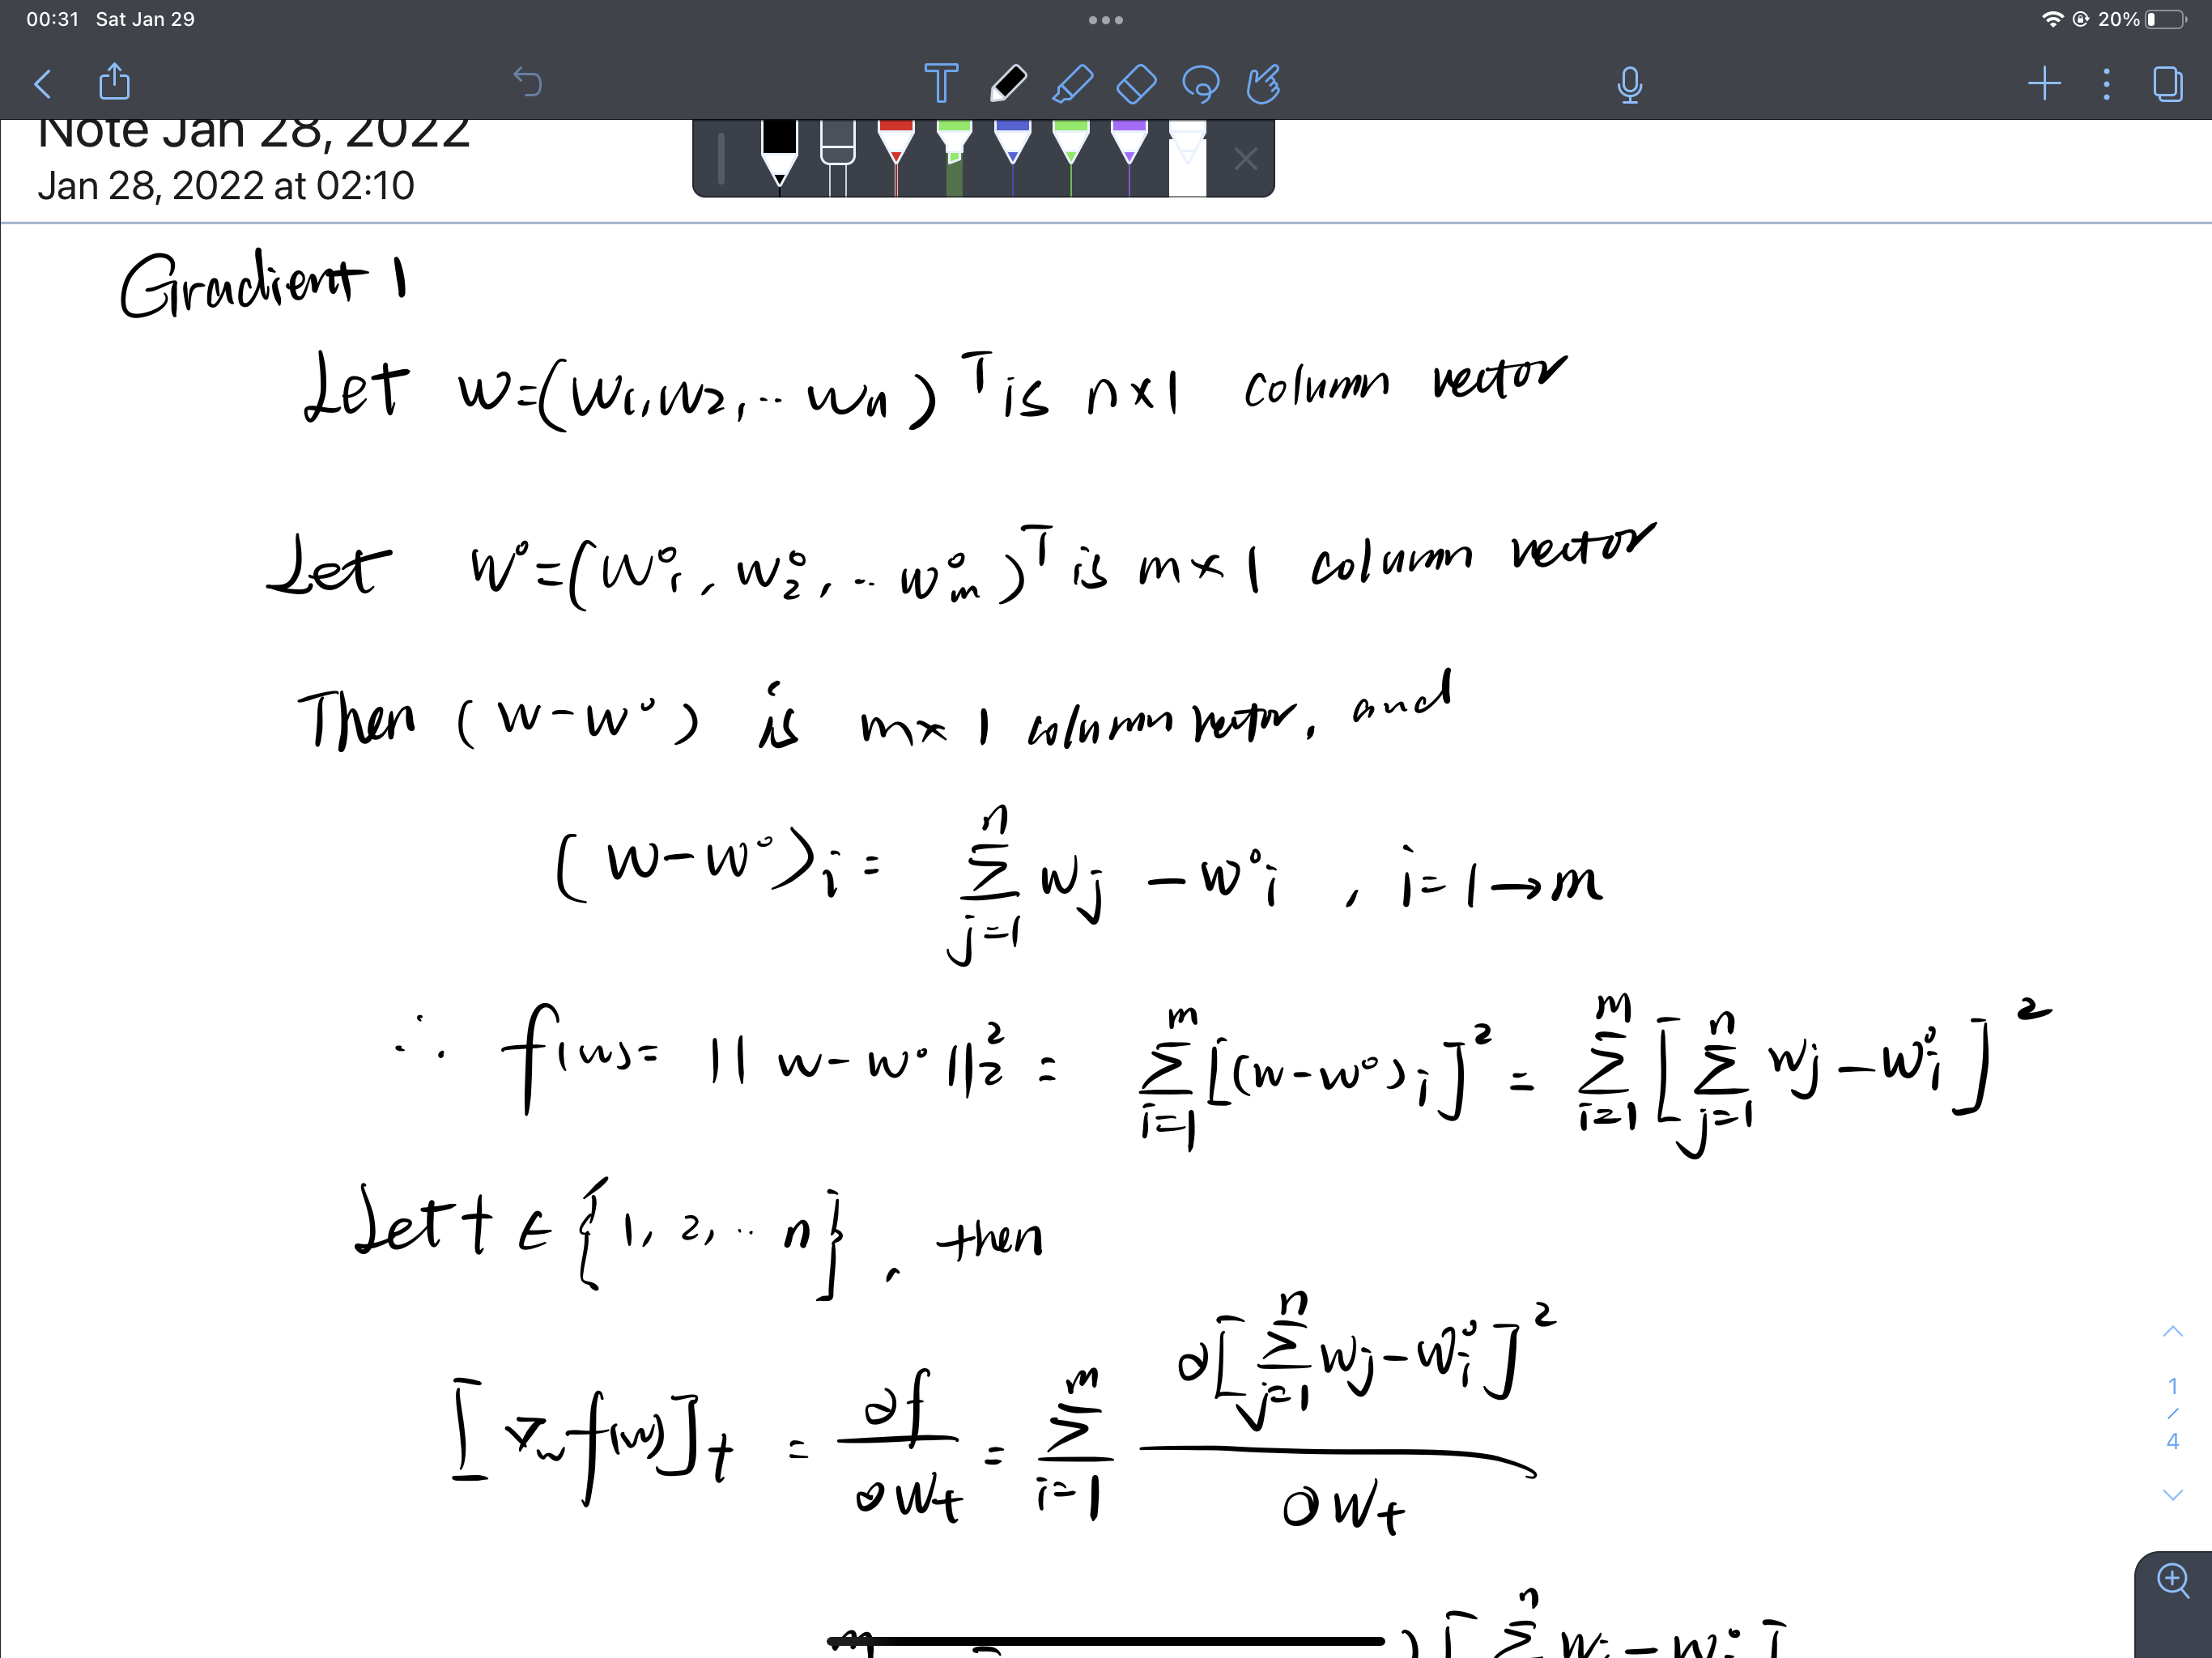

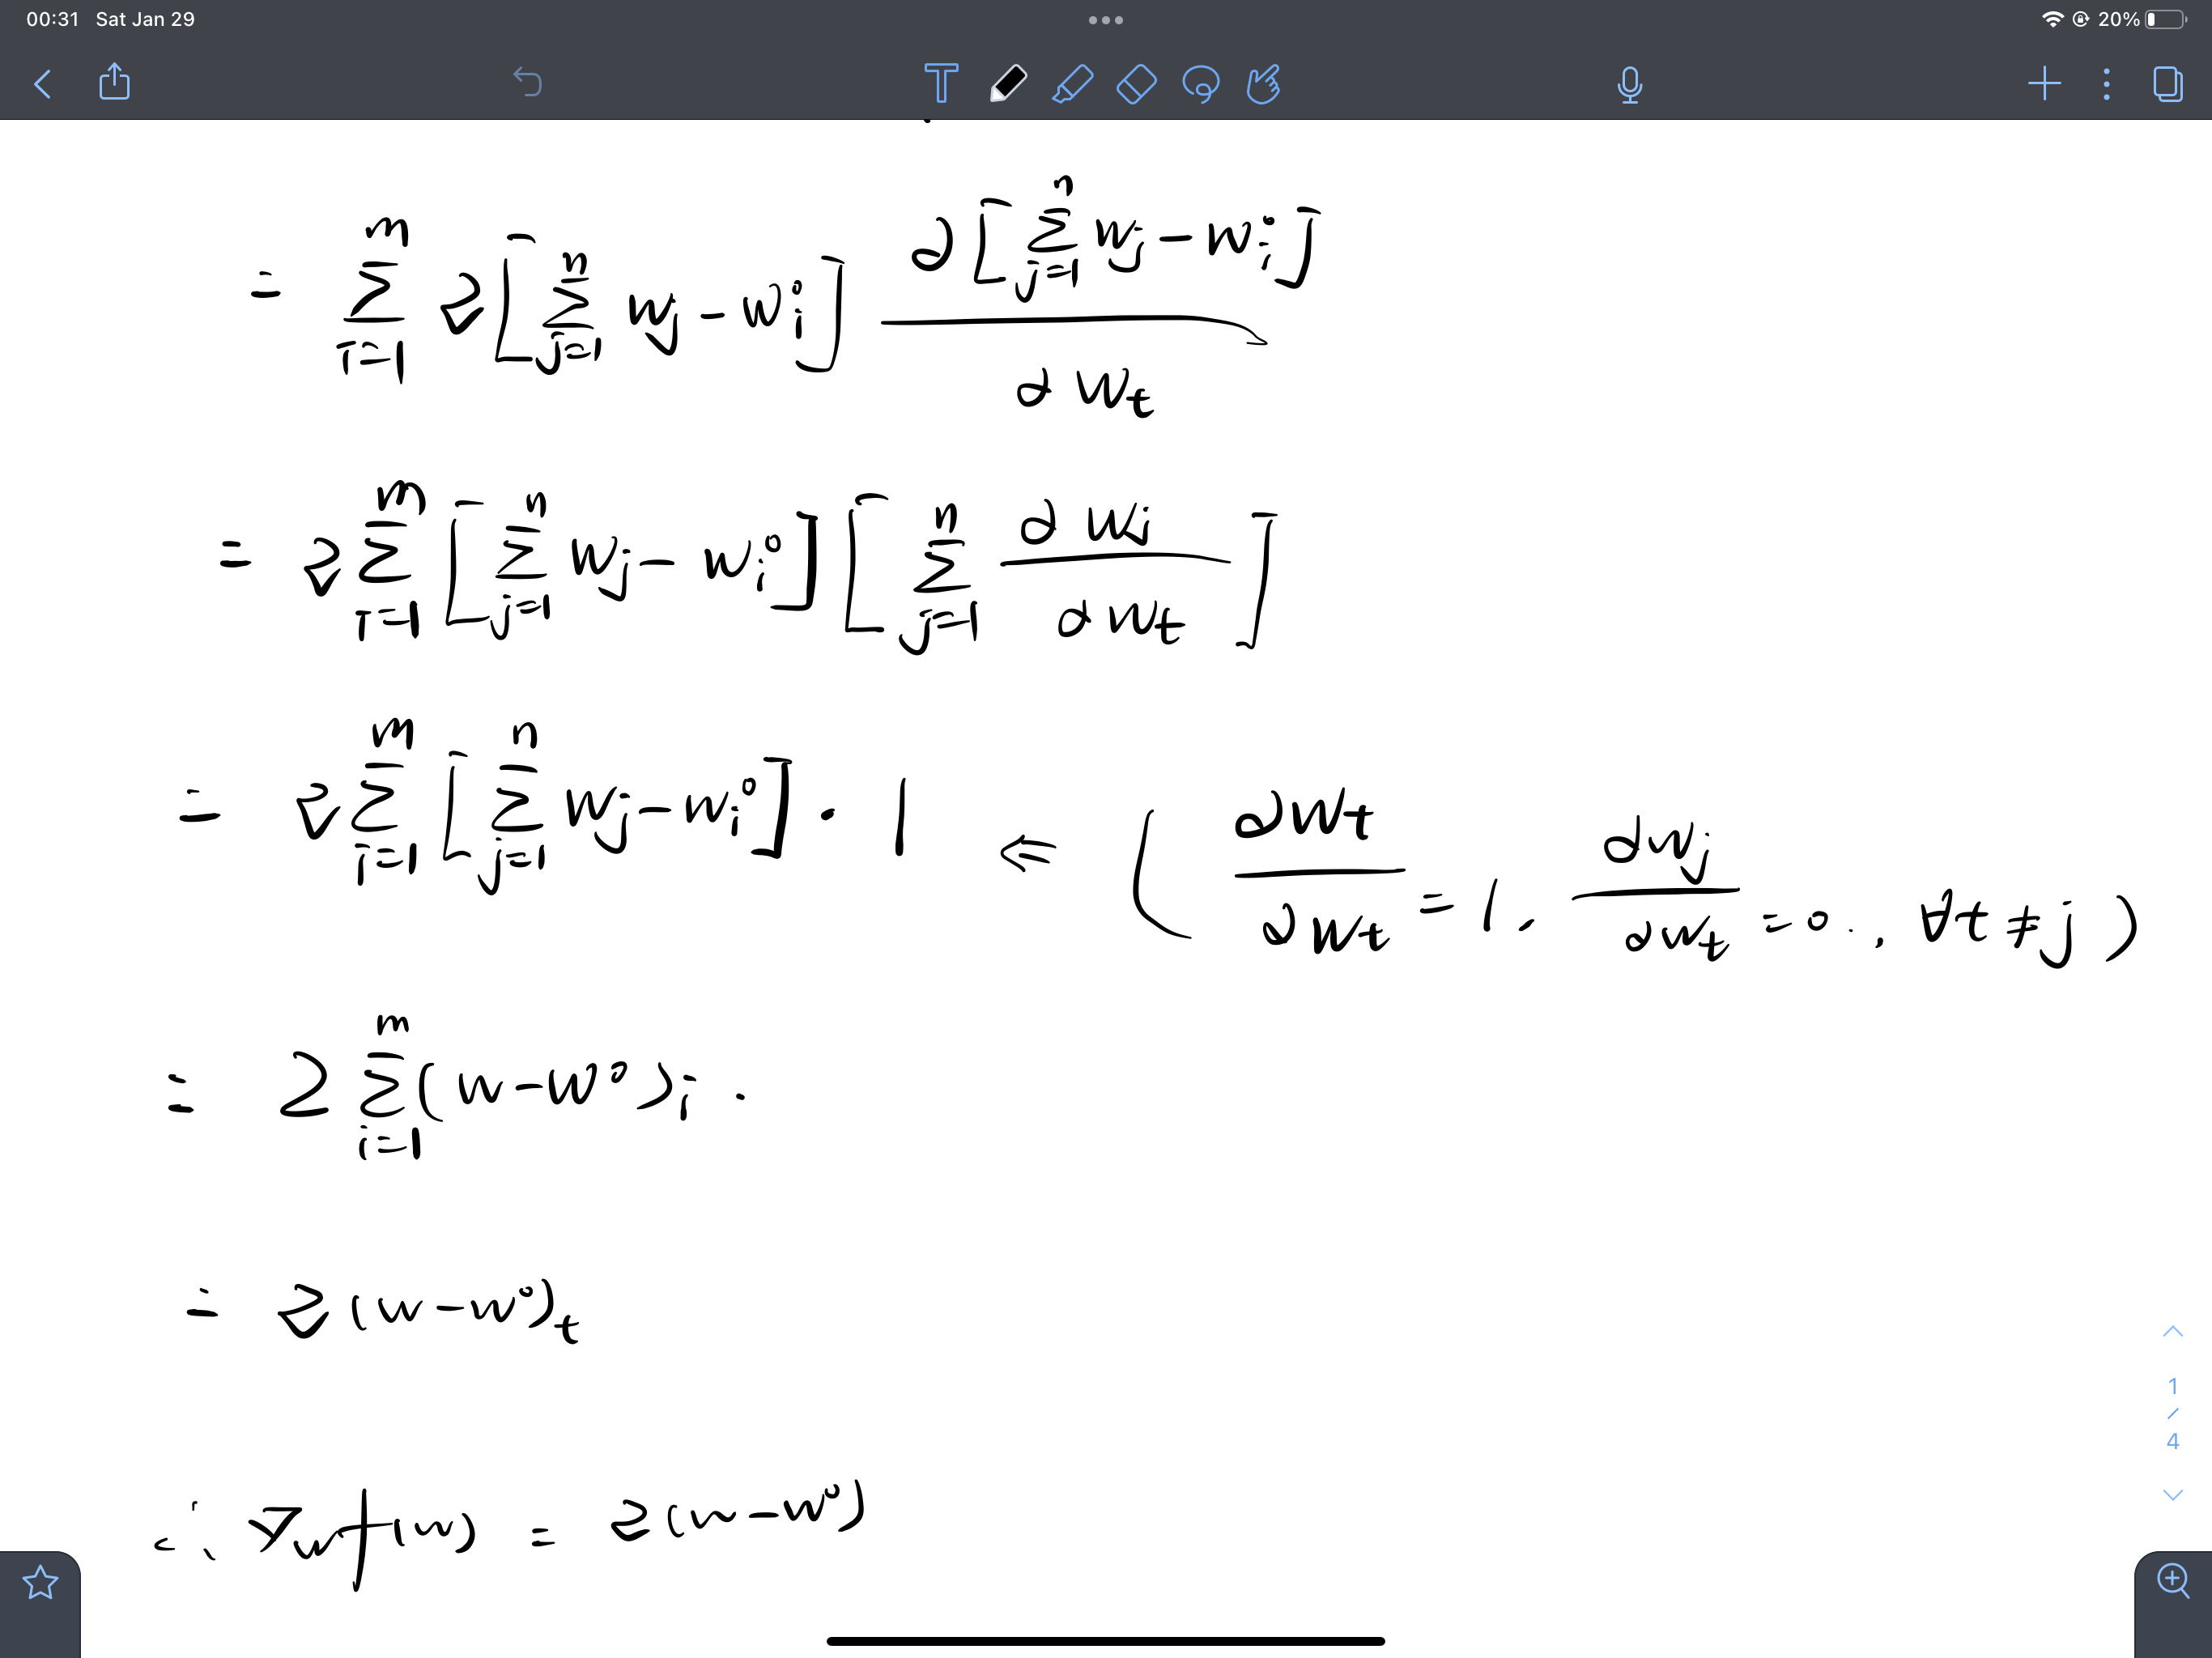

gradient 2

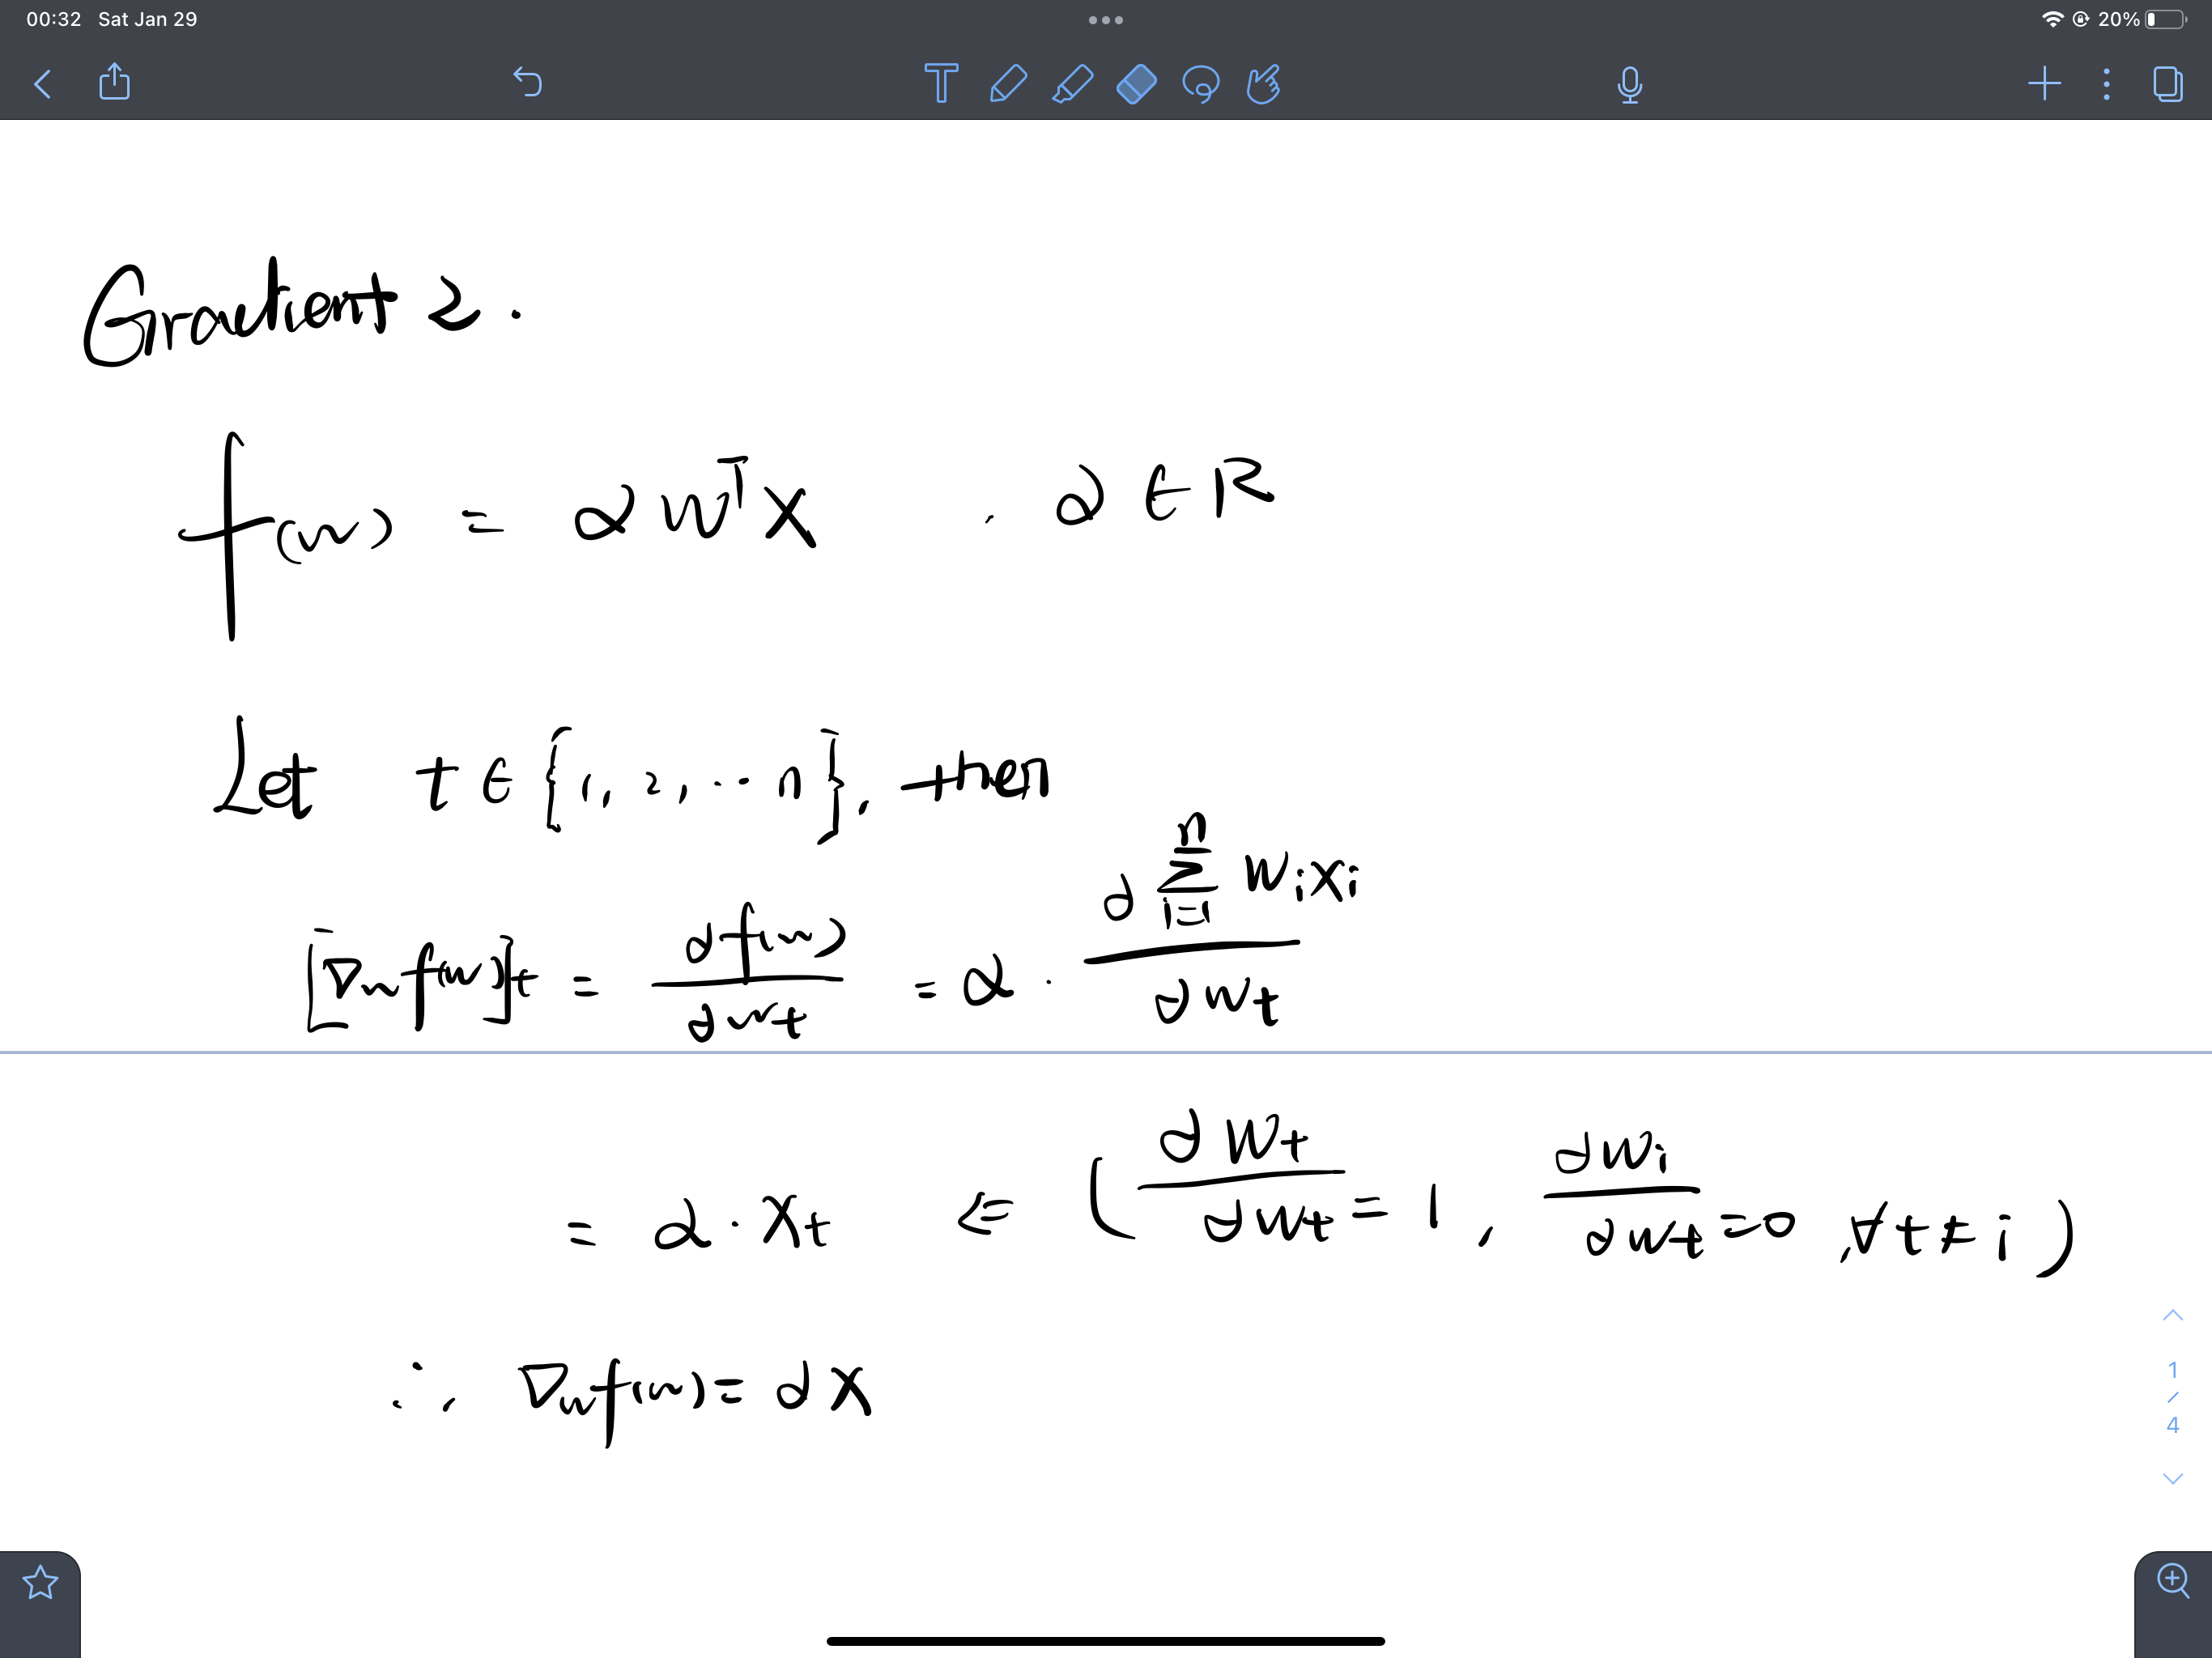

# QUESTION 5

In [1]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import random
import numpy as np

gradient descent 

In [2]:
N = 5000
d = 1000
X = np.random.randn(N,d)
w = np.random.normal(0, 1,size = (1000,))
y = np.dot(X,w)
#5000 sample，1000 features, 1000 weights

def sgd(samples, y, step_size=0.01, max_iter_count=10000):
    sample_num, dim = samples.shape
    y = y.flatten()
    w = np.random.rand(dim,)
    loss = 10
    iter_count = 0
    iter_list = []
    loss_list = []
    while loss > 0.0001 and iter_count < max_iter_count:
        loss = 0
        error = np.zeros((dim,), dtype=np.float64)
        for i in range(sample_num):
            predict_y = np.dot(w.T, samples[i])
            for j in range(dim):
                error[j] += (y[i] - predict_y) * samples[i][j]
                w[j] += step_size * error[j] / sample_num   # renew w for each sample
        for i in range(sample_num):
            predict_y = np.dot(w.T, samples[i])
            error = (1 / (sample_num * dim)) * np.power((predict_y - y[i]), 2)
            loss += error
        iter_list.append(iter_count)
        loss_list.append(loss)
        #print("iter_count: ", iter_count, "the loss:", loss)
        iter_count += 1
    return w,iter_list ,loss_list

def mbgd(samples, y, step_size=0.01, max_iter_count=10000, batch_size = 0.3):
    sample_num, dim = samples.shape
    y = y.flatten()
    w = np.random.rand(dim,)
    loss = 10
    iter_count = 0
    iter_list = []
    loss_list = []
    while loss > 0.0001 and iter_count < max_iter_count:
        loss = 0
        error = np.zeros((dim,), dtype=np.float64)

        # choose mini batch data randomly 
        index = random.sample(range(sample_num), int(np.ceil(sample_num * batch_size)))
        batch_samples = samples[index]
        batch_y = y[index]

        for i in range(len(batch_samples)):
            predict_y = np.dot(w.T, batch_samples[i])
            for j in range(dim):
                # compute loss function
                error[j] += (batch_y[i] - predict_y) * batch_samples[i][j]

        #  re-new mini batch weights
        for j in range(dim):
            w[j] += step_size * error[j] / len(batch_samples)


        for i in range(sample_num):
            predict_y = np.dot(w.T, samples[i])
            error = (1 / (sample_num * dim)) * np.power((predict_y - y[i]), 2)
            loss += error
        iter_list.append(iter_count)
        loss_list.append(loss)
        #print("iter_count: ", iter_count, "the loss:", loss)
        iter_count += 1
    return w,iter_list ,loss_list

sgd

w: [ 2.63564077e-01  1.58458070e-01  2.84036441e-01  2.00972000e-02
  1.22714691e+00  6.17236665e-01  5.08191910e-02 -4.69061929e-01
  5.92243653e-01 -7.35596350e-01  1.99961271e-01 -6.06726743e-01
 -4.11264085e-01 -7.35776944e-01  7.72991863e-01  5.62481551e-03
 -2.17391197e-01  4.40832424e-02  8.05927364e-01 -9.91520896e-01
 -9.38137041e-01  7.21157095e-01  5.50792751e-01 -7.92895222e-01
  1.64544424e+00 -4.74593859e-01 -1.39113884e+00  9.48389418e-01
  1.08654191e+00  5.30994593e-01  7.78148822e-01 -8.67638664e-01
 -6.45902890e-01 -2.13854108e+00  1.32683881e+00  5.39784235e-01
  8.52429738e-01  3.32220229e-01  3.98460388e-01  9.31198213e-01
 -1.50295543e-02 -4.32130042e-01  1.31431149e-01  8.87986224e-01
  4.27914878e-01  3.96788990e-02 -5.39417680e-01 -4.78620397e-01
  5.36191958e-01  1.16593374e+00  7.61858266e-01  1.71909339e+00
 -3.10478034e-01 -4.77971894e-01 -1.75771625e+00  5.10998830e-02
  6.54541707e-01  1.15932098e+00  4.08885009e-01 -5.06946986e-01
 -1.43154552e-01  4.79

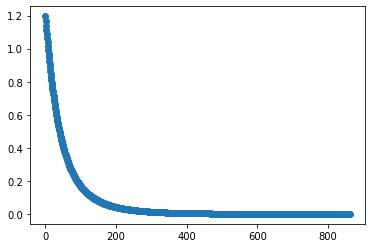

In [3]:
w_sgd,iter_sgd,loss_sgd = mbgd(X,y)
print('w:',w_sgd)
plt.scatter(iter_sgd,loss_sgd)

mbgd

w: [ 2.53535522e-01  1.50789988e-01  2.88590776e-01  1.88622592e-02
  1.23843263e+00  6.21841747e-01  3.57232486e-02 -4.68702810e-01
  5.98420155e-01 -7.23169546e-01  1.95775564e-01 -5.93691245e-01
 -4.15376925e-01 -7.29972093e-01  7.65760938e-01  3.95212262e-04
 -2.16052861e-01  3.67359001e-02  8.10270322e-01 -9.81468862e-01
 -9.31565829e-01  7.23737841e-01  5.42718423e-01 -7.91738419e-01
  1.65295952e+00 -4.79145159e-01 -1.39420537e+00  9.42773245e-01
  1.09015124e+00  5.26571241e-01  7.74535843e-01 -8.80375352e-01
 -6.40236687e-01 -2.13949279e+00  1.32664467e+00  5.36111856e-01
  8.39618638e-01  3.37239739e-01  4.07297035e-01  9.50216933e-01
 -1.70935823e-02 -4.29408461e-01  1.37783444e-01  8.98620081e-01
  4.33648929e-01  4.90941867e-02 -5.44176537e-01 -4.86711440e-01
  5.36922689e-01  1.16690462e+00  7.69048985e-01  1.71710932e+00
 -3.08027056e-01 -4.74763188e-01 -1.75851413e+00  5.44551800e-02
  6.50507668e-01  1.15618886e+00  4.06787884e-01 -5.11076946e-01
 -1.35985723e-01  5.13

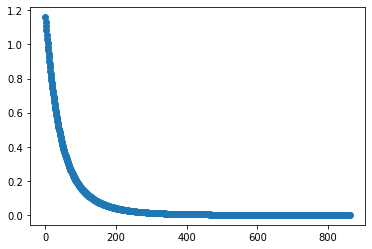

In [4]:
w_mbgd,iter_mbgd,loss_mbgd = mbgd(X,y)
print('w:',w_mbgd)
plt.scatter(iter_mbgd,loss_mbgd)

ridge regression

In [12]:
clf = linear_model.RidgeCV(fit_intercept=False)
clf.fit(X, y)  
w_ridge = clf.coef_ 
print('w:',w_ridge)

w: [ 2.81718784e-01  1.47613189e-01  3.01109938e-01  2.51709530e-02
  1.25783444e+00  6.29545618e-01  3.88925237e-02 -5.08397056e-01
  5.96773815e-01 -7.15322031e-01  2.08518301e-01 -6.18157837e-01
 -3.99712198e-01 -7.58758130e-01  7.66793837e-01 -3.97730040e-04
 -2.00156767e-01  4.25215497e-02  8.06101918e-01 -9.78804797e-01
 -9.52717405e-01  7.22849528e-01  5.33946966e-01 -8.29998378e-01
  1.67458174e+00 -4.73728449e-01 -1.39714459e+00  1.02529281e+00
  1.10901288e+00  5.28038336e-01  7.78016942e-01 -9.00200370e-01
 -6.25591799e-01 -2.16186488e+00  1.33768568e+00  5.46524149e-01
  8.56233217e-01  3.54296674e-01  4.04196439e-01  9.31058430e-01
 -1.66493042e-02 -4.20511257e-01  1.48935942e-01  8.89925795e-01
  4.29379936e-01  1.10555222e-02 -5.59857438e-01 -4.79090749e-01
  5.42623635e-01  1.18722120e+00  7.67875657e-01  1.71038944e+00
 -3.27042774e-01 -4.80007173e-01 -1.79912086e+00  5.90115027e-02
  6.47033155e-01  1.16733263e+00  3.90832092e-01 -5.16505427e-01
 -1.57046754e-01 -1.39

relative error

In [6]:
def re_error(w1,w2):#w1 gd w2 ridge
  relative_error = []
  for i in range(len(w1)):
    re_error = (w1[i] - w2[i])/w2[i]
    relative_error.append(re_error)
  return np.mean(relative_error)

In [7]:
error1 = re_error(w_sgd,w_ridge)
error2 = re_error(w_mbgd,w_ridge)

In [11]:
print('relative error between sgd and ridge is:',error1)
print('relative error between mbgd and ridge is:',error2)

relative error between sgd and ridge is: -0.008225232452581409
relative error between mbgd and ridge is: -0.009209397133930005


# QUESTION 6

In [189]:
#lasso regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

#L1 model
lasso=linear_model.LassoCV()
lasso.fit(X,y)

alpha = lasso.alpha_
lbd = lasso.coef_
intercept = lasso.intercept_

print('solution w-hat:',lbd)

solution w-hat: [-0.55639157  0.89200699  1.28227231  0.40348885  0.98947413  0.23980948
  1.37518439 -1.14673125  2.0128848   0.48228102  0.02791328  0.28101074
  0.24787382  0.36773255  0.46440858  1.1293976   0.69912162 -1.60367697
 -0.46226474  0.25006555  0.98327711 -0.60537038 -0.26850429  0.01627604
  0.46497572 -0.0792596  -1.25260061  1.09426389  0.79872674 -1.28187297
  0.59138606  2.50676804  0.47119785  1.46562149 -0.55326004 -0.71526141
  0.93912526  2.04477221 -0.23030133  0.82849984  0.53096774 -0.03540579
  0.02814157  0.57156468  0.38770058 -0.93760792  0.13911863 -0.887553
 -0.8159552   0.49986839  1.47427813 -0.04069058  0.72555854 -0.01659307
  1.43294131  1.42525338  2.40066076  0.55980941  1.17056404  2.05516618
 -1.53061814  1.38373048 -2.41961947 -1.02339888  2.97487677  0.07002393
 -1.15722399  0.45188746  0.80250971  0.1157206  -0.14388843 -1.09818826
  1.46578871 -1.73835837  0.97061415 -1.80738502  0.67372839 -0.80996608
  1.18763264 -0.69485152 -0.08868559 